# Análise de desligamento de colaboradores

### 1) Importação das bibliotecas necessárias, carregamento de dados e análise inicial

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# carregamento dos dados
df = pd.read_csv('archive (3)/base atrittion.csv')

In [3]:
# amostra dos dados
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
81,35,No,Travel_Rarely,1214,Research & Development,1,3,Medical,1,105,...,1,80,0,6,3,3,6,4,0,4
322,32,No,Travel_Rarely,1018,Research & Development,2,4,Medical,1,439,...,3,80,0,10,0,2,7,7,0,7
777,21,Yes,Travel_Rarely,1334,Research & Development,10,3,Life Sciences,1,1079,...,1,80,0,1,6,2,1,0,1,0
981,35,Yes,Travel_Frequently,662,Sales,18,4,Marketing,1,1380,...,3,80,1,5,0,2,4,2,3,2
277,38,No,Travel_Rarely,322,Sales,7,2,Medical,1,382,...,3,80,1,8,3,3,8,0,7,7


### 2) Análise Exploratória dos Dados

Devido ao tamanho do dataset, a verificação das colunas que são desnecessárias foi feita diretamente no excel. Serão excluídas as seguintes colunas: EmployeeCount,	EmployeeNumber,	Over18,	StandardHours, DailyRate, HourlyRate,MonthlyRate

In [4]:
# Verificação dos tipos de dados
print(df.dtypes)
print('-'*60)
print(df.iloc[0])


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
# contagem de colaboradores ativos e desligados
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

### 3) Tratamento de dados

In [6]:
# alteração da variável target para número inteiro
dic_attrition = {'Yes' : 1, 'No' : 0}
df['Attrition'] = df['Attrition'].map(dic_attrition)
df['Attrition'].value_counts()

In [9]:
# alteração de outras variáveis para numéricas com a finalidade de analisar a correlação
df['OverTime'] = df['OverTime'].map(dic_attrition)
df['OverTime'].value_counts()

In [11]:
dic_BusinessTravel = {'Travel_Rarely' : 1, 'Travel_Frequently' : 2, 'Non-Travel' : 0}
df['BusinessTravel'] = df['BusinessTravel'].map(dic_BusinessTravel)
df['BusinessTravel'].value_counts()

In [14]:
dic_Department = {'Sales' : 1, 'Research & Development' : 2, 'Human Resources' : 3}
df['Department'] = df['Department'].map(dic_Department)
df['Department'].value_counts()

In [17]:
dic_Marital = {'Single' : 1, 'Married' : 2, 'Divorced' : 3}

In [18]:
df['MaritalStatus'] = df['MaritalStatus'].map(dic_Marital)
df['MaritalStatus'].value_counts()

MaritalStatus
2    673
1    470
3    327
Name: count, dtype: int64

In [19]:
# novo dataset com as colunas desnecessárias excluídas
colunas = ['Age','Attrition','BusinessTravel','Department','DistanceFromHome','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
df = df.loc[:,colunas]
display(df)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,2,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,2,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,2,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,2,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,2,23,2,Medical,3,Male,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,1,2,6,1,Medical,4,Male,2,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,1,2,4,3,Life Sciences,2,Male,4,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,2,1,2,3,Medical,4,Male,2,...,3,4,0,17,3,2,9,6,0,8


### 4) Análise de correlação entre as variáveis

<Axes: >

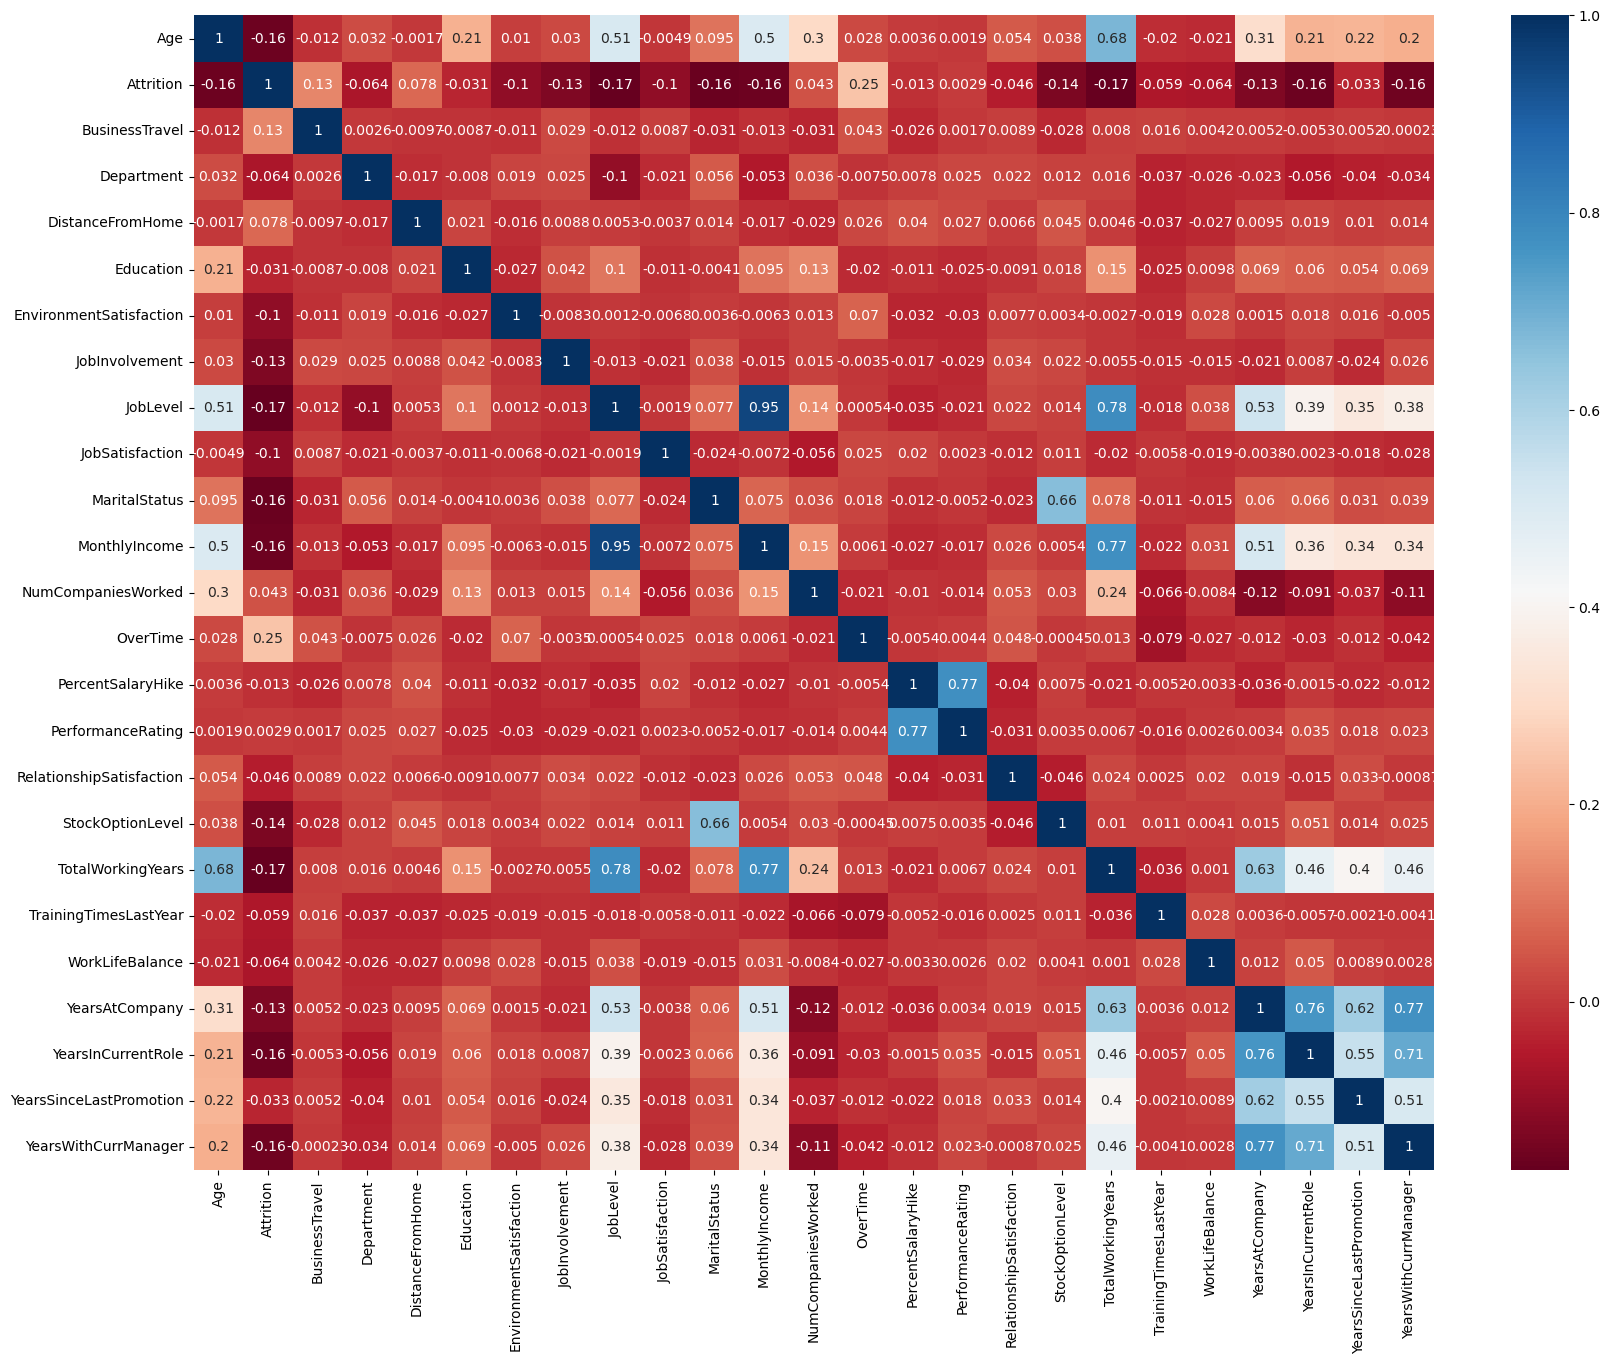

In [26]:
# análise de correlação entre as variáveis numéricas
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', linecolor='white')

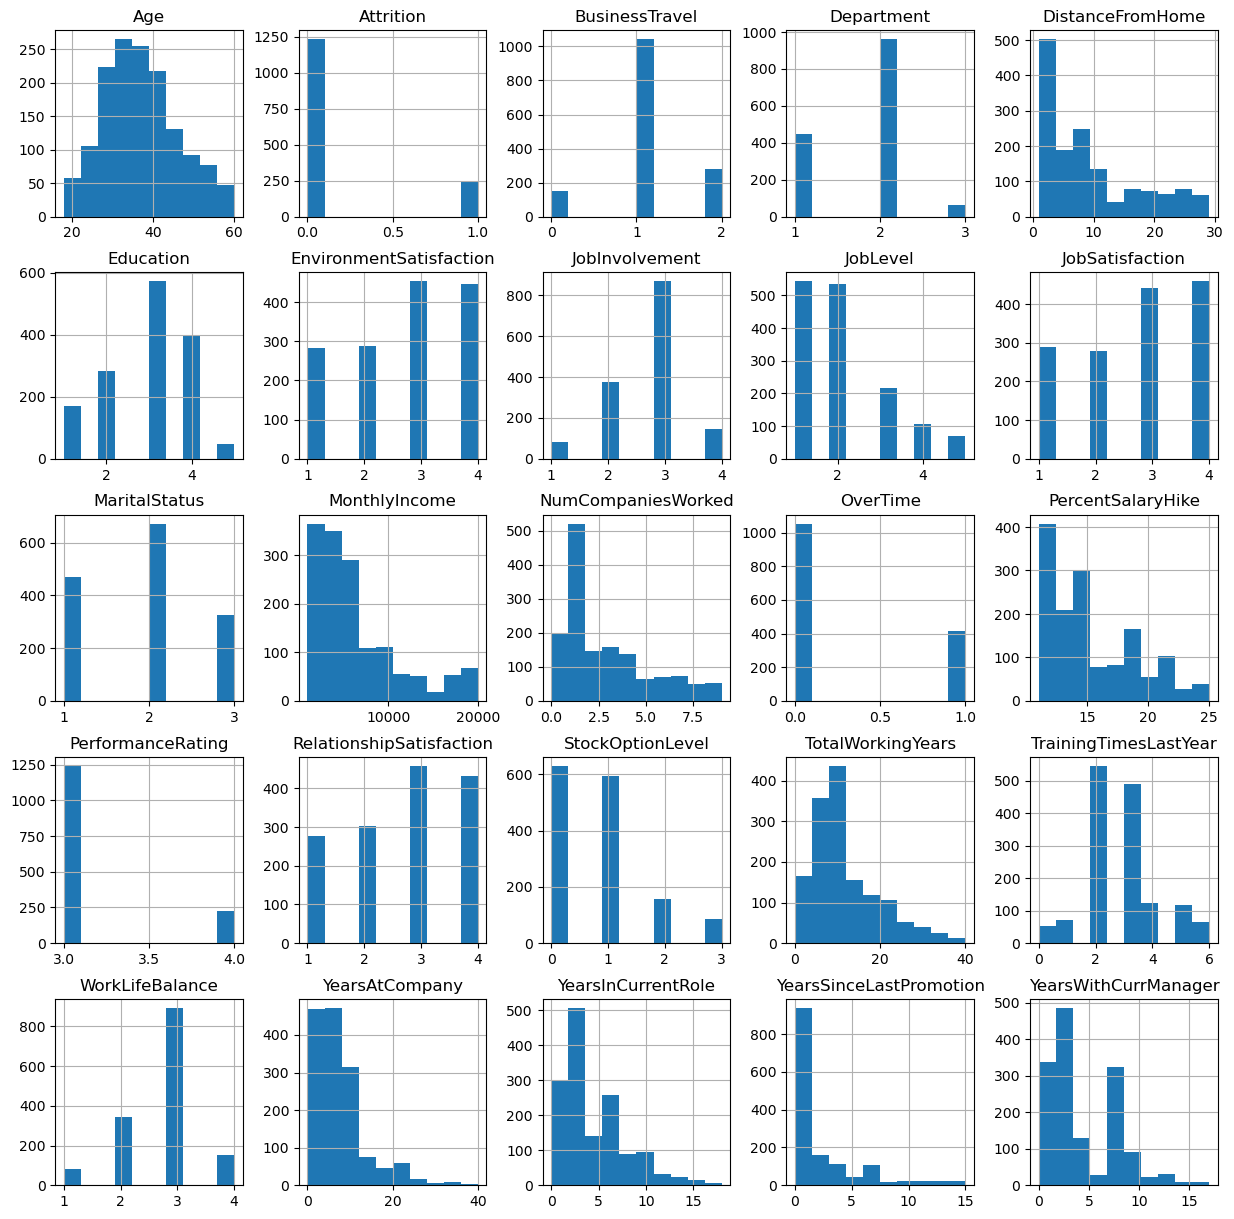

In [21]:
# Plot 
df.hist(figsize = (15,15), bins = 10) 
plt.show()

Parece haver outliers nas colunas YearsAtCompany, YearsInCurrentRole, YearsSineLastPromotion e YearsWitCurrManager, mas devido a natureza da análise, eles não serão excluídos pois estes outliers tratam-se de alguns colaboradores com muitos anos de trabalho na empresa

In [22]:
# dividir os dados entre colaboradores ativos e desligados
df_desligados = df[df.Attrition == 1]
df_ativos = df[df.Attrition == 0]

In [23]:
df_desligados.shape


(237, 28)

In [24]:
df_ativos.shape

(1233, 28)

A apresentação do relatório será no Power BI